In [1]:
from imgseries import ImgSeries
from imgseries.readers import SingleImageReader
import cv2
%matplotlib inline

# Use other tool to read images

By default, **imgseries** uses `skimage.io` to read and write images. To use other packages/tools, it is possible to create a customized image manager and pass it as an argument to `ImgSeries`.
To avoid re-writing the whole image manager, simply inherit from it and redefine only the methods you would like to customize. For example, to use `opencv` to read images instead of `skimage`:

In [2]:
class CustomImageReader(SingleImageReader):

    @staticmethod
    def _read_image(filepath):
        """load file into image array (file: pathlib Path object)."""
        return cv2.imread(str(filepath), 0)  # opencv needs str, not Path object

Let's use and compare the customized image reader to the default one

In [3]:
images_default = ImgSeries('../data/img1')
images_custom = ImgSeries('../data/img1', Reader=CustomImageReader)

(<Axes: title={'center': 'img-00613.png (#3)'}>,)

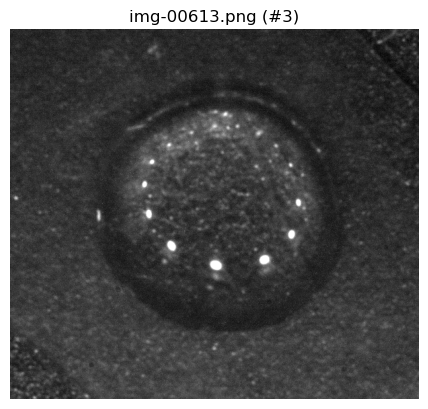

In [4]:
images_default.show(num=3)

(<Axes: title={'center': 'img-00613.png (#3)'}>,)

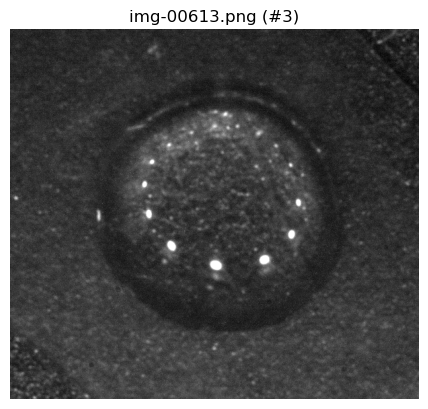

In [5]:
images_custom.show(num=3)

In [6]:
%timeit images_default.read(num=22)

2.44 ms ± 32.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
%timeit images_custom.read(num=22)

2.46 ms ± 306 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In order to avoid passing the custom image manager all the time, one can create a custom ImgSeries class:

In [8]:
class ImgSeriesCustom(ImgSeries):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, Reader=CustomImageReader, **kwargs)

In [9]:
images = ImgSeriesCustom('../data/img1')
images

ImgSeriesCustom, data length [30]
-- corrections: []
-- transforms: []
from FileSeries in . / ['../data/img1'], 30 files]

In [10]:
images?

Type:            ImgSeriesCustom
String form:    
ImgSeriesCustom, data length [30]
-- corrections: []
-- transforms: []
from FileSeries in . / ['../data/img1'], 30 files]
Docstring:       <no docstring>
Class docstring: Class to manage series of images, possibly in several folders.
Init docstring: 
Init image series object.

Parameters
----------
paths : str, path object or iterable of those
    can be a string, path object, or a list of str/paths if data
    is stored in multiple folders.

extension : str
    extension of files to consider (e.g. '.png')

savepath: str or path object
    folder in which to save parameters (transform, display etc.)

corrections : iterable of str
    iterable of names of corrections to consider
    (their order indicates the order in which they are applied),
    e.g. corrections=('flicker', 'shaking');
    if None, use default order.

transforms : iterable of str
    iterable of names of transforms to consider
    (their order indicates the order in whi